In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as msle
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict

In [282]:
df = pd.read_csv("./dataset.csv")

Exploratory Data Analysis (EDA)  

[Understanding the Data](#section)


## <a id="section"> Section 1</a>
##### Graphs showing revenue, budget, runtime variations over the years

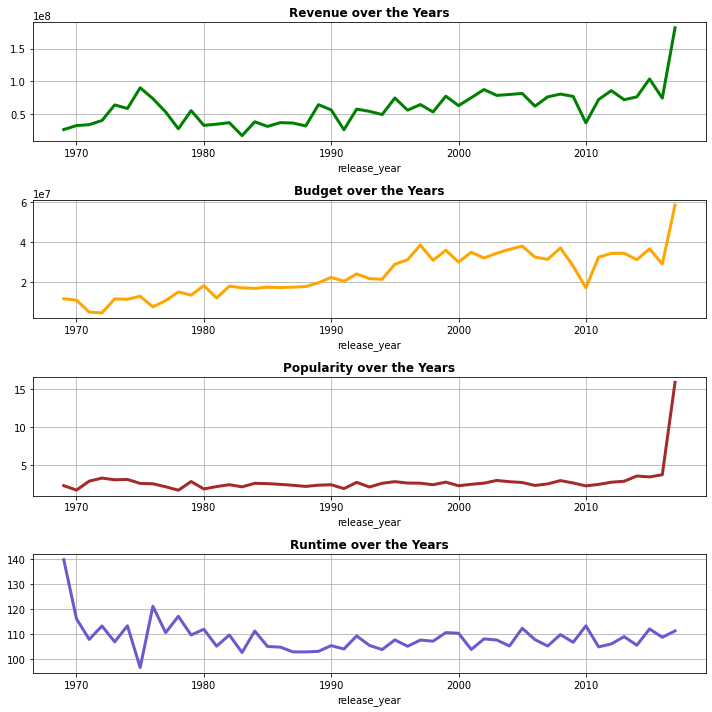

In [283]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

df.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

df.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

df.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

df.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()


<a id=’section-2’></a>
### Section 2
##### Figures comparing Revenue with budget, popularity and runtime

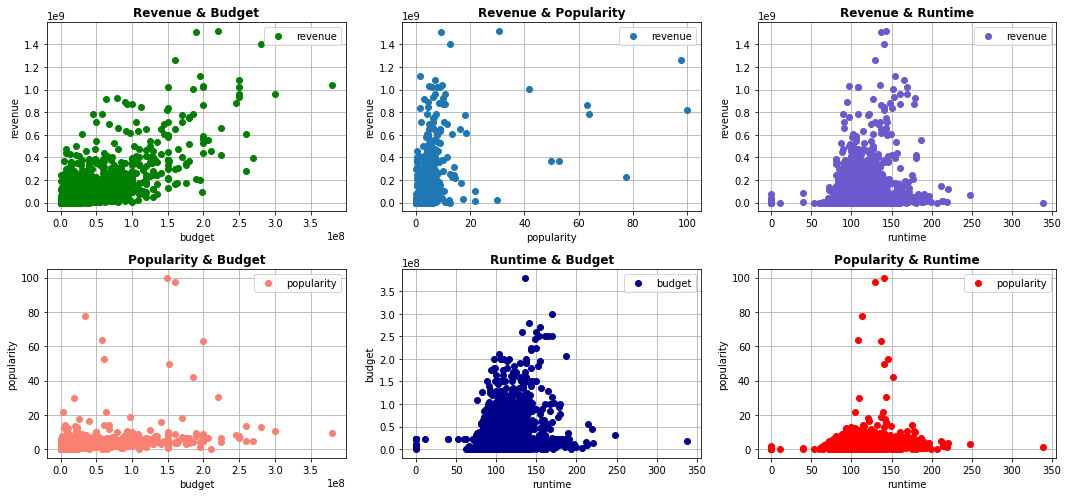

In [284]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

df.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

df.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

df.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

df.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

df.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

df.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='red').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

Splitting dataset for training and testing

In [285]:
x = df[['budget', 'genres', 'popularity', 'production_companies', 'runtime', 'spoken_languages', 'cast']]
y = df['revenue']
for index, row in df.iterrows():
    try:
        x.at[index, 'genres'] = len((row['genres']))
    except:
        x.at[index, 'genres'] = 0
    try:
        x.at[index, 'production_companies'] = len((row['production_companies']))
    except:
        x.at[index, 'production_companies'] = 0
    try:
        x.at[index, 'spoken_languages'] = len((row['spoken_languages']))
    except:
        x.at[index, 'spoken_languages'] = 0
    try:
        x.at[index, 'cast'] = len((row['cast']))
    except:
        x.at[index, 'cast'] =  0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<AxesSubplot:>

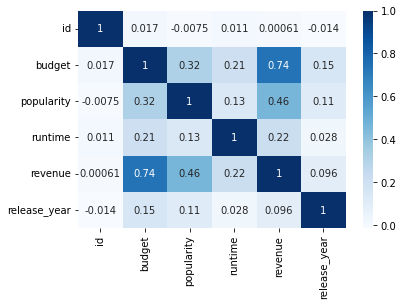

In [286]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Text(0.5, 1.0, 'Revenue for film with and without collection')

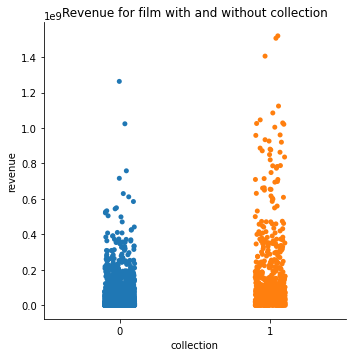

In [287]:
data = df.copy()
data['collection'] = 0
data.loc[data['belongs_to_collection'].isnull() == False, 'collection'] = 1

#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=data)
plt.title('Revenue for film with and without collection')

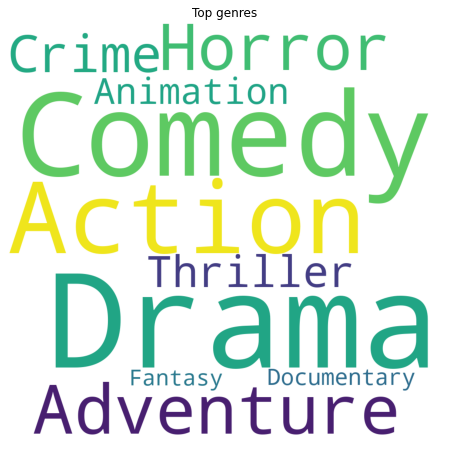

OrderedDict([('TV Movie', 1),
             ('Foreign', 2),
             ('Western', 13),
             ('History', 16),
             ('War', 20),
             ('Music', 20),
             ('Mystery', 33),
             ('Family', 36),
             ('Science Fiction', 41),
             ('Romance', 67),
             ('Fantasy', 68),
             ('Documentary', 71),
             ('Animation', 76),
             ('Thriller', 116),
             ('Crime', 147),
             ('Horror', 170),
             ('Adventure', 187),
             ('Action', 520),
             ('Comedy', 604),
             ('Drama', 785)])

In [288]:
genres = {}
for i in data['genres']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in genres:
            genres[eval(i)[0]['name']]=1
        else:
                genres[eval(i)[0]['name']]+=1
                
plt.figure(figsize = (12, 8))
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()
genres = OrderedDict(genres)
#Drama, Comedy and Thriller are popular genres
OrderedDict(sorted(genres.items(), key=lambda t: t[1]))

In [289]:
genres_count=[]
for i in data['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
data['num_genres'] = genres_count

Text(0.5, 1.0, 'Revenue for different number of genres in the film')

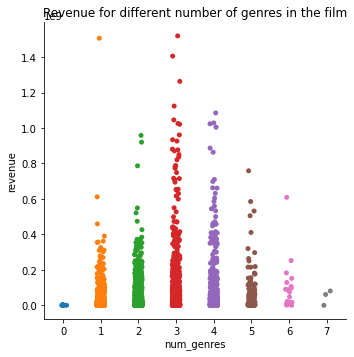

In [290]:
sns.catplot(x='num_genres', y='revenue', data=data)
plt.title('Revenue for different number of genres in the film')

In [291]:
prod_comp_count=[]
for i in data['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count.append(len(eval(i)))
        
    else:
        prod_comp_count.append(0)
data['num_prod_companies'] = prod_comp_count

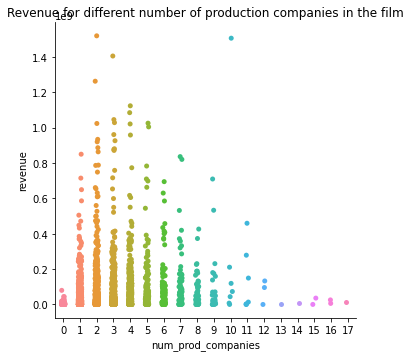

In [292]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=data);
plt.title('Revenue for different number of production companies in the film');

In [293]:
#production_countries
#Adding production_countries count for  data
prod_coun_count=[]
for i in data['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count.append(len(eval(i)))
        
    else:
        prod_coun_count.append(0)
data['num_prod_countries'] = prod_coun_count

Text(0.5, 1.0, 'Revenue for different number of production countries in the film')

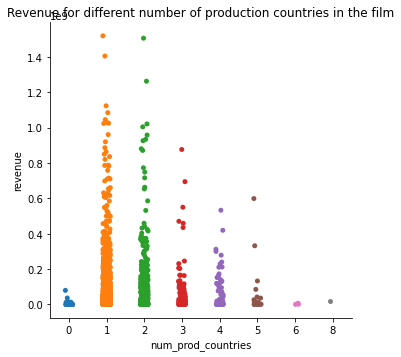

In [294]:
sns.catplot(x='num_prod_countries', y='revenue', data=data)
plt.title('Revenue for different number of production countries in the film')

In [295]:
total_cast=[]
for i in data['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
data['cast_count'] = total_cast

Text(0.5, 1.0, 'Number of cast members vs revenue')

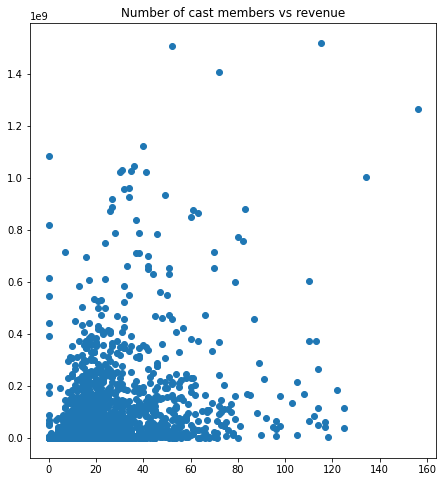

In [296]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['cast_count'], data['revenue'])
plt.title('Number of cast members vs revenue')

In [297]:
total_crew=[]
for i in data['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
data['crew_count'] = total_crew


Text(0.5, 1.0, 'Number of crew members vs revenue')

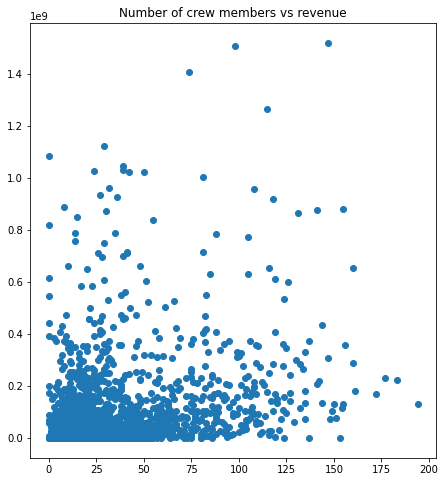

In [298]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['crew_count'], data['revenue'])
plt.title('Number of crew members vs revenue')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

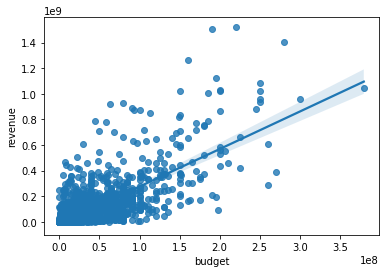

In [299]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data=data)

In [300]:
genres = []
repeated_revenues = []
for i in range(len(data)):
  if data['genres'][i] == data['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(data['genres'][i])]
      genres.extend(movie_genre)
      repeated_revenues.extend([data['revenue'][i]]*len(movie_genre))
  
genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

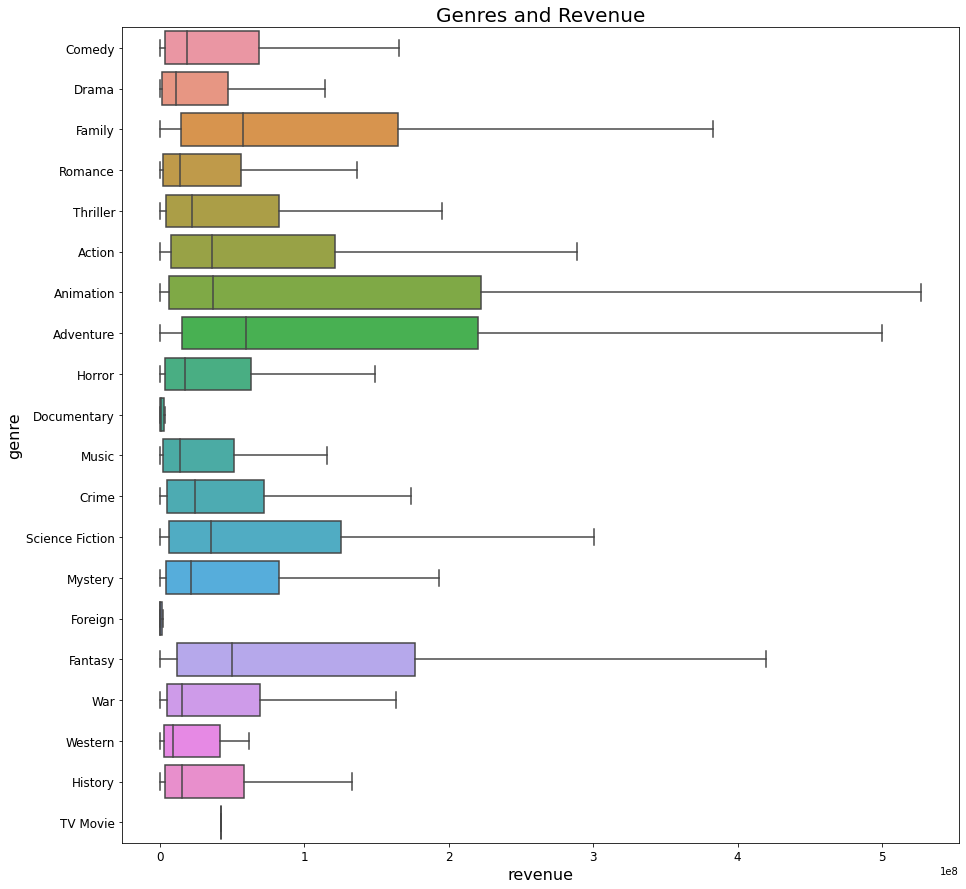

In [301]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()


<a id="section"> Section 1</a>
### Graphs showing revenue, budget, runtime variations over the years

In [302]:
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def change_to_text(x):
    return weeks.index(x)

data['day'] = data['release_day_of_the_week'].apply(lambda x : change_to_text(x))


In [303]:
y = data['revenue']
data.drop(columns= ['id', 'belongs_to_collection', 'revenue', 'genres', 'language', 'title', 'overview', 'production_companies', 'release_day_of_the_week', 'production_countries','spoken_languages', 'status', 'tagline', 'Keywords', 'cast', 'crew','release_year','release_date'], axis = 1, inplace = True)

In [304]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [309]:
LR = LinearRegression()
LR.fit(data,y)
y_prediction =  LR.predict(x_test)
print(sum((y_test - y_prediction)) / 600)

def rmsle(y,y0): 
    return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))

rmsle = rmsle(y_prediction, y_test)
print(rmsle)

-3190483.694225173
2.7933441459240833


/tmp/ipykernel_46524/2210862633.py:13: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))


In [311]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)
print(y_test - y_prediction)

2859   -1.87e+07
87      1.71e+07
1172   -2.36e+07
337     5.85e+06
976    -1.40e+08
2372    4.46e+07
1439   -3.67e+07
497     5.03e+06
240    -1.85e+07
2364    1.18e+06
449    -1.08e+08
154    -2.51e+07
1957   -4.24e+07
1651   -5.39e+07
2870    2.55e+07
1765   -6.90e+06
270    -1.74e+07
1071    8.87e+06
1830    1.57e+08
438     4.22e+07
925     2.83e+07
2353   -2.76e+07
1732    1.67e+06
883     2.26e+07
2225    3.30e+06
343    -2.09e+06
1446   -2.25e+07
25      4.87e+06
2238   -1.44e+07
2921   -7.56e+07
1244   -5.29e+07
888     3.36e+08
1135   -5.14e+07
1401    5.62e+07
1027   -1.90e+07
482    -6.12e+07
1753   -7.36e+06
2522   -4.55e+07
1022   -4.86e+06
858    -3.08e+07
2034    9.42e+07
2192    3.08e+07
1060   -1.06e+07
2987   -1.15e+07
1051   -9.35e+05
2815    2.49e+07
464     5.16e+07
1224   -1.25e+08
51     -4.11e+06
238     4.45e+08
2804   -2.54e+07
569    -1.21e+07
892    -8.76e+06
1733   -1.25e+07
527    -6.46e+07
43     -5.73e+05
706     3.73e+07
2346   -3.61e+07
1410   -2.52e+